In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Business Analyst course-20230721T112259Z-001/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression/salaries.csv")
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
#Analysing the data
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<ipython-input-5-ff5468909c6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-5-ff5468909c6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

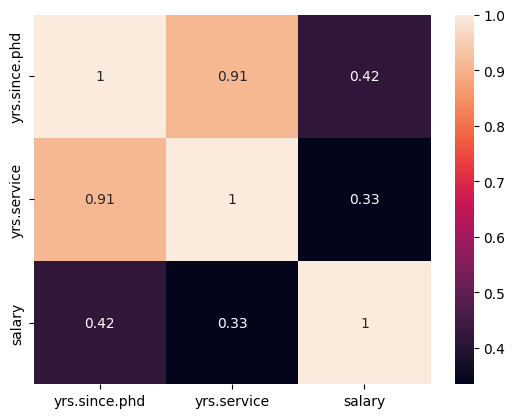

In [5]:
data.corr()
sns.heatmap(data.corr(), annot=True)

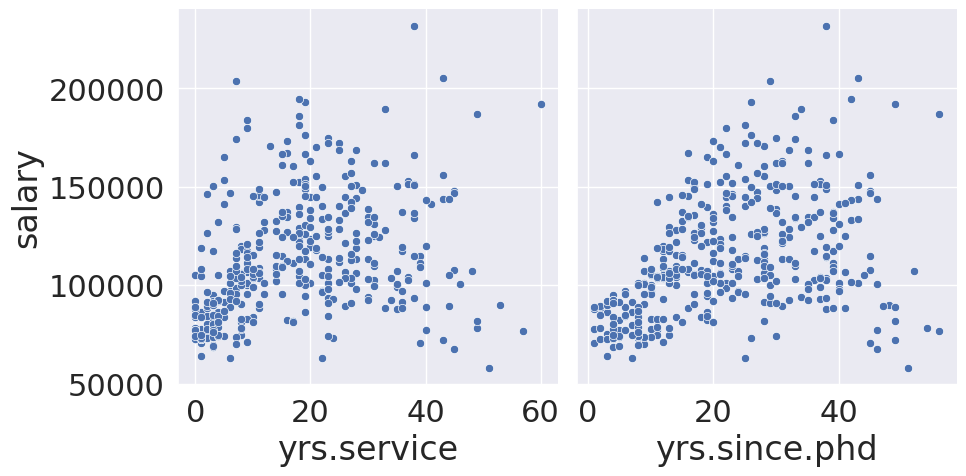

In [6]:
sns.set(font_scale = 2)
sns.pairplot(data, y_vars = ["salary"], x_vars = ["yrs.service","yrs.since.phd"],height = 5);

In [7]:
#Categorical variable
data["rank"].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [8]:
data.select_dtypes(include = "object").value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [9]:
categorical = list(data.select_dtypes(include = "object"))
for cat in categorical:
  print(data[cat].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [11]:
data = pd.get_dummies(data = data, drop_first = True)
data

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,0,1,0,1
393,31,19,150564,0,1,0,1
394,42,25,101738,0,1,0,1
395,25,15,95329,0,1,0,1


In [13]:
y = data.salary / 1000
X = data.drop(columns = ["salary","yrs.service"])
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [14]:
X = sm.add_constant(X)
X.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)


In [16]:
model = sm.OLS(y_train,X_train).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     59.56
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.23e-43
Time:                        16:10:42   Log-Likelihood:                -1430.3
No. Observations:                 317   AIC:                             2873.
Df Residuals:                     311   BIC:                             2895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            77.2615      5.630     13.724      0.000      66.184      88.339
yrs.since.phd     0.2089      0.140      1.489      0.137      -0.067       0.485
rank_AsstProf   -11.6465      4.591     -2.537      0.012     -20.679      -2.614
rank_Prof        33.1164      3.867      8.563      0.000      25.507      40.726
discipline_B     15.7998      2.571      6.146      0.000      10.742      20.858
sex_Male          4.2243      4.552      0.928      0.354      -4.733      13.181
==============================================================================
Omnibus:                       30.936   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.380
Skew:                           0.658   Prob(JB):                     2.31e-10
Kurtosis:                       4.275   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred = model.predict(X_test)
pred

114    112.884363
278    119.615064
237     67.077117
57      99.165384
72     136.459206
          ...    
366    117.735238
340    133.117293
132     79.350194
3      139.801119
18     122.330368
Length: 80, dtype: float64

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
round(mean_absolute_error(y_test,pred))

17

In [23]:
round(np.sqrt(mean_squared_error(y_test,pred)),1)

24.6